

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Graffiti with Video





Import Libraries & get url


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [83]:
yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'
yesterday = str(yesterday)[1:-1]
print(type(yesterday))
print(yesterday)

<class 'str'>
'2016-12-09'


### get url

In [56]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
#url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'
#startdate = "'2016-12-09'"
startdate = yesterday
url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/gbya-e2d3.csv?$where=opened>='2016-12-09'


In [57]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

## Set Display Column with wider so no problem with Media URL series

In [58]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [59]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [60]:
df = pd.read_csv(url)

In [61]:
df.shape

(62, 16)

#### wow, 5 days > 1000 reports

In [62]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6613548,12/09/2016 11:30:08 PM,NaN,12/09/2016 11:30:08 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"39 BRANT ALY, SAN FRANCISCO, CA, 94133",3,North Beach,"(37.801882899509, -122.410614858466)",Open311,NaN
1,6613513,12/09/2016 10:41:33 PM,NaN,12/09/2016 11:07:28 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"490 SOUTH VAN NESS AVE, SAN FRANCISCO, CA, 94103",9,Mission,"(37.765511320074, -122.417678769023)",Open311,NaN
2,6613493,12/09/2016 10:17:07 PM,NaN,12/09/2016 10:17:07 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of BRANT ALY and,3,North Beach,"(37.801843032, -122.410065937)",Open311,NaN


In [63]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [64]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6613548,2016-12-09 23:30:08,NaT,2016-12-09 23:30:08,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"39 BRANT ALY, SAN FRANCISCO, CA, 94133",3,North Beach,"(37.801882899509, -122.410614858466)",Open311,NaN
1,6613513,2016-12-09 22:41:33,NaT,2016-12-09 23:07:28,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"490 SOUTH VAN NESS AVE, SAN FRANCISCO, CA, 94103",9,Mission,"(37.765511320074, -122.417678769023)",Open311,NaN
2,6613493,2016-12-09 22:17:07,NaT,2016-12-09 22:17:07,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of BRANT ALY and,3,North Beach,"(37.801843032, -122.410065937)",Open311,NaN


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=9.0, right=9.0
  'left=%s, right=%s') % (left, right))


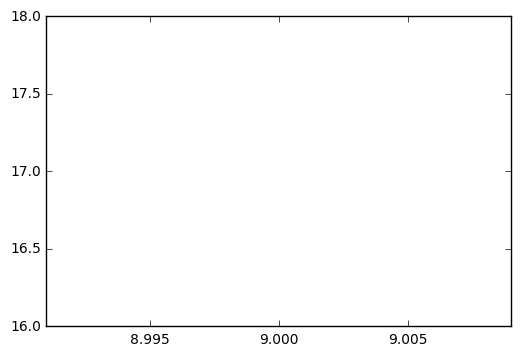

In [65]:
df.Closed.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=9.0, right=9.0
  'left=%s, right=%s') % (left, right))


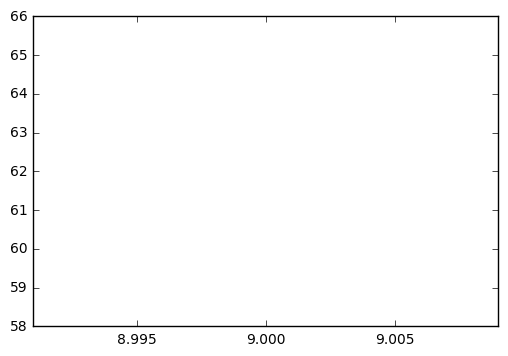

In [66]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=4.0, right=4.0
  'left=%s, right=%s') % (left, right))


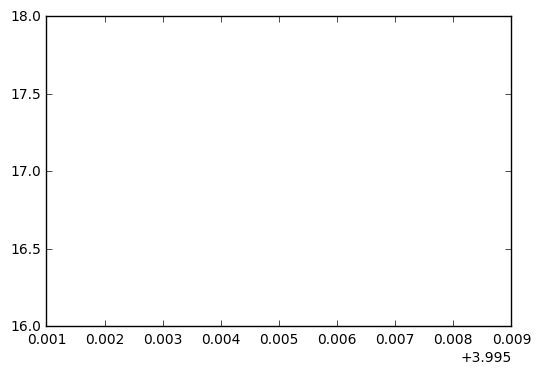

In [67]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [68]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [69]:

df['Request Details'].value_counts()


Encampment Cleanup    62
Name: Request Details, dtype: int64

In [70]:
df['Supervisor District'].value_counts().sort_index()



1      1
2      1
3      4
4      1
5      1
6     21
7      2
8      4
9     20
10     7
Name: Supervisor District, dtype: int64

In [71]:
df.Neighborhood.value_counts()

Mission               21
South of Market       15
Duboce Triangle        3
Potrero Hill           2
Financial District     2
North Beach            2
Tenderloin             2
Polk Gulch             1
Mission Bay            1
Mt. Davidson Manor     1
Outer Richmond         1
Haight Ashbury         1
Civic Center           1
Mission Dolores        1
Showplace Square       1
Silver Terrace         1
Bayview                1
Central Waterfront     1
Outer Sunset           1
Nob Hill               1
Pacific Heights        1
Ingleside Terraces     1
Name: Neighborhood, dtype: int64

In [72]:
df[df.Neighborhood == 'Mission'].head(8)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
1,6613513,2016-12-09 22:41:33,NaT,2016-12-09 23:07:28,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"490 SOUTH VAN NESS AVE, SAN FRANCISCO, CA, 94103",9,Mission,"(37.765511320074, -122.417678769023)",Open311,NaN
3,6613470,2016-12-09 21:46:49,NaT,2016-12-09 22:22:23,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1880 MISSION ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.767159874561, -122.420032495993)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584b96b93da19793c74c7781/report.jpg
8,6613225,2016-12-09 18:30:06,NaT,2016-12-09 18:30:06,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 20TH ST and FLORIDA ST,9,Mission,"(37.7591338604323, -122.410758686679)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584b689f3da19793c74c750c/photo_20161209_182919.jpg
9,6613206,2016-12-09 18:22:11,NaT,2016-12-09 18:30:07,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 15TH ST and JULIAN AVE,9,Mission,"(37.7665993360598, -122.421056485527)",Voice In,NaN
15,6613090,2016-12-09 17:42:35,NaT,2016-12-09 17:44:05,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 15TH ST and SHOTWELL ST,9,Mission,"(37.7668713217817, -122.416548520311)",Voice In,NaN
20,6612840,2016-12-09 16:21:35,NaT,2016-12-09 16:38:57,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"173 JULIAN AVE, SAN FRANCISCO, CA, 94103",9,Mission,"(37.765482212884, -122.420807484437)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584b4a7d3da19793c74c71cc/photo_20161209_162049.jpg
26,6612294,2016-12-09 14:35:25,2016-12-09 18:25:34,2016-12-09 18:25:34,Closed,Area Cleaned -,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"2063 BRYANT ST, SAN FRANCISCO, CA, 94110",10,Mission,"(37.760967580906, -122.409973593306)",Open311,NaN
27,6612174,2016-12-09 14:12:34,NaT,2016-12-09 14:13:59,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 16TH ST and SHOTWELL ST,9,Mission,"(37.765249409965, -122.416387642122)",Voice In,NaN



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [73]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']


In [74]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b96b93da19793c74c7781/report.jpg
1     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b7dd53da19793c74c7594/photo_20161209_200001.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b689f3da19793c74c750c/photo_20161209_182919.jpg
3     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b54063da19793c74c732d/photo_20161209_170106.jpg
4                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b52f43da19793c74c72f8/report.jpg
5                    http://mobile311.sfgov.org/media/san_francisco/report/photos/584b4b6d3da19793c74c7216/report.jpg
6     http://mobile311.sfgov.org/media/san_francisco/report/photos/584b4a7d3da19793c74c71cc/photo_20161209_162049.jpg
7           http://mobile311.sfgov.org/media/san_francisco/report/photos/584b37ec3da19793c74c6db2/20161209_145352.jpg
8                    http://mobile311.sfgov.org/media/sa

In [75]:
len(images)

28

In [76]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/584b96b93da19793c74c7781/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/584ae7bb3da19793c74c5d20/report.jpg


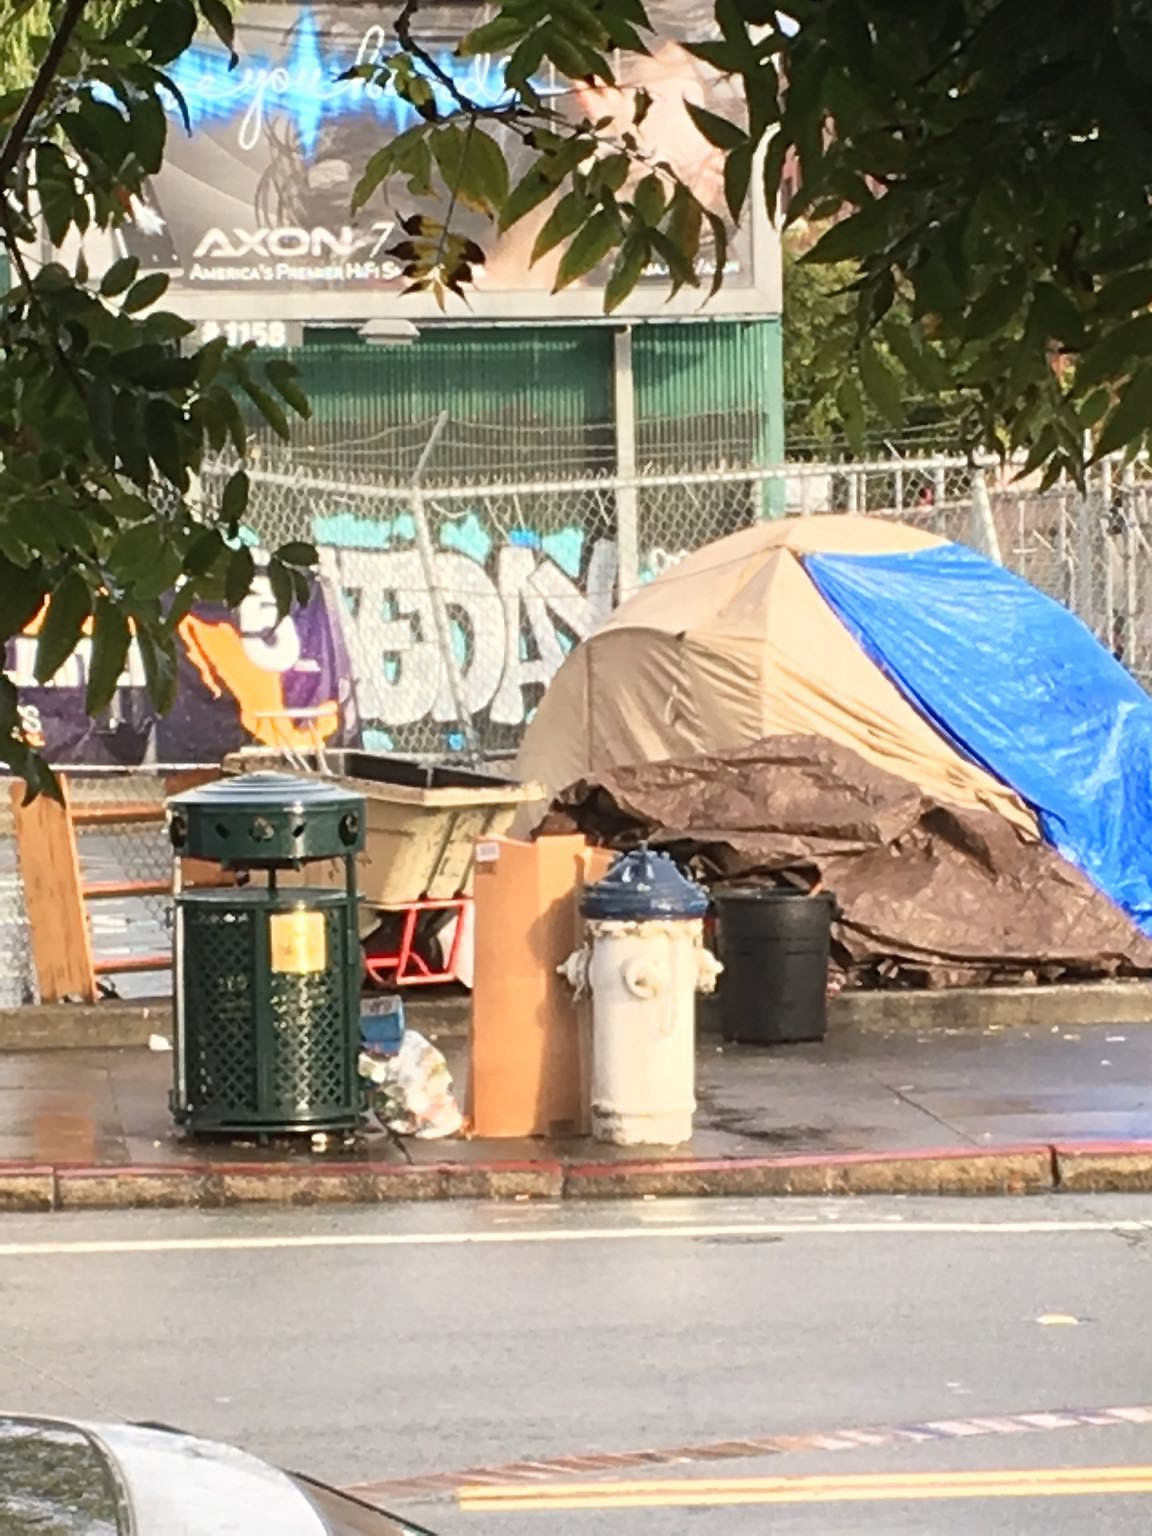

In [77]:
print(images[20])
Image(images[20])


In [78]:
!pwd

/home/gdillon/JupyterPractice/homeless_311


In [79]:
images[:180].to_csv("./imagelist.txt", index=False)

In [82]:
!yes| bash vidCreate.sh

--2016-12-10 21:43:43--  http://mobile311.sfgov.org/media/san_francisco/report/photos/584b96b93da19793c74c7781/report.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167386 (163K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 163.46K   942KB/s    in 0.2s    

2016-12-10 21:43:44 (942 KB/s) - 'report.jpg' saved [167386/167386]

--2016-12-10 21:43:44--  http://mobile311.sfgov.org/media/san_francisco/report/photos/584b7dd53da19793c74c7594/photo_20161209_200001.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 61408 (60K) [image/jpeg]
Saving to: 'photo_20161209_200001.jpg'

photo_20161209_2000 100%[===================>]  59.97K  --.-KB/s    in 0s      

2016-12-10 21:43:44 (295 MB/s) - 'photo_20161209_200001.jpg' saved [6

In [80]:
'''
Had problems with this code, running standalone

%cd assets/
!wget -i ../imagelist.txt

!sleep 30
#%ls | gawk 'BEGIN{ a=1 }{ printf "mv \"%s\" %04d.jpg\n", $0, a++ }' | bash
#!sleep 10
#!convert -delay 50 *.jpg out.mp4
%cd ..
'''

'\nHad problems with this code, running standalone\n\n%cd assets/\n!wget -i ../imagelist.txt\n\n!sleep 30\n#%ls | gawk \'BEGIN{ a=1 }{ printf "mv "%s" %04d.jpg\n", $0, a++ }\' | bash\n#!sleep 10\n#!convert -delay 50 *.jpg out.mp4\n%cd ..\n'

In [27]:
#!convert -delay 50 *.jpg out.mp4


In [28]:
!ls


San+Francisco+Concerns-Homeless Aggressive behavior and well being.ipynb
San+Francisco+Homeless Encampments.ipynb
San+Francisco+Homeless+Data+Analysis (1).ipynb
San+Francisco+Homeless+Data+Analysis.ipynb
San+Francisco+Poop.ipynb
assets
gifCreate.sh
gistfile1.txt
imagelist.txt
input
sfOneDay.ipynb
vidCreate.sh
video.gif
video.webm


In [29]:
Image('report2.jpg')